Wasil Fawad Malik
2022623
AI351-A (AI)

# **Credit Card Fraud Detection**

The purpose of this project is to use machine learning algorithms to analyze credit card transactions histories and effectively detect and classify fraudulent activities. Combining historical transaction data allows us to pattern match and detect anomalies in fraudulent behavior. This analysis will be able to point to a robust predictive model that would accurately flag and identify potentially fraudulent transactions in real time. Such a model could lead to the significantly reduction of fraudulent charges and transactions, to increase the credit card transactions security and integrity.
The models that will be implemented are the following:
1. **Random Forest**
2. **Logistic Regression**
3. **Extreme Gradient Boost (XGBoost)**
4. **Isolation Forest**

### 1. Importing Libraries:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (classification_report, confusion_matrix,
                           roc_auc_score, roc_curve, precision_recall_curve)
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, IsolationForest
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE
import joblib
import warnings
warnings.filterwarnings('ignore')

### 2. Loading the Dataset:
The following dataset was obtained from [Kaggle](https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud/data).

The dataset contains transactions made by credit cards in September 2013 by European cardholders.
This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.


> "Given the class imbalance ratio, we recommend measuring the accuracy using the Area Under the Precision-Recall Curve (AUPRC). Confusion matrix accuracy is not meaningful for unbalanced classification."

Due to this warning, this project has used **SMOTE** (Synthetic Minority Over-sampling Technique) to balance the classifications, resulting in more accuracy in confusion matrices.

In [ ]:
data = pd.read_csv('creditcard.csv')

print("Dataset Information:")
print(data['Class'].value_counts())
print("\nClass distribution (%)")
print(100 * data['Class'].value_counts() / len(data))

Dataset Information:
Class
0    284315
1       492
Name: count, dtype: int64

Class distribution (%)
Class
0    99.827251
1     0.172749
Name: count, dtype: float64


#### 2.1. Exploratory Data Analysis:

In [ ]:
print("\nDataset Head:")
print(data.head())


Dataset Head:
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26      

In [ ]:
print("\nDataset Info:")
print(data.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64


In [ ]:
print("\nDataset Description:")
print(data.describe())


Dataset Description:
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00 

### 3. Data Preprocessing:

In [ ]:
# Separate features and target
X = data.drop(columns=['Class'], axis=1)
y = data['Class']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Handle class imbalance with SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_scaled, y)

### 4. Train-Test Split:

In [ ]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.3, random_state=42
)

### 5. Model Building:

Random Forest Results:

Confusion Matrix:
[[85012   137]
 [ 1921 83519]]

Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     85149
           1       1.00      0.98      0.99     85440

    accuracy                           0.99    170589
   macro avg       0.99      0.99      0.99    170589
weighted avg       0.99      0.99      0.99    170589


ROC-AUC Score: 0.9994


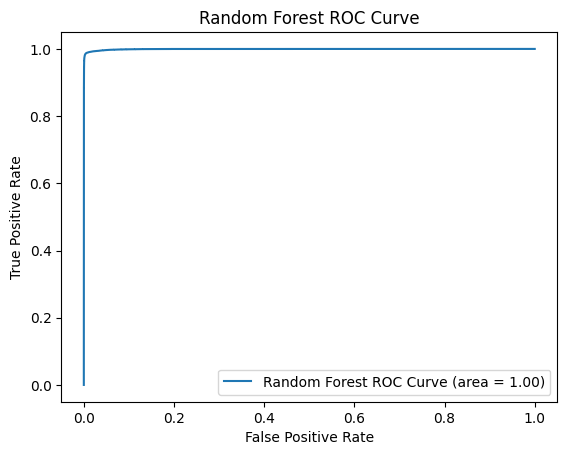

In [ ]:
# Random Forest:

rf_model = RandomForestClassifier(random_state=42, n_estimators=100, max_depth=10)
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))

rf_roc_auc = roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {rf_roc_auc:.4f}")

# Plot ROC Curve for Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest ROC Curve (area = {rf_roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Random Forest ROC Curve")
plt.legend(loc="lower right")
plt.show()

Logistic Regression Results:

Confusion Matrix:
[[83028  2121]
 [ 6494 78946]]

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.98      0.95     85149
           1       0.97      0.92      0.95     85440

    accuracy                           0.95    170589
   macro avg       0.95      0.95      0.95    170589
weighted avg       0.95      0.95      0.95    170589


ROC-AUC Score: 0.9899


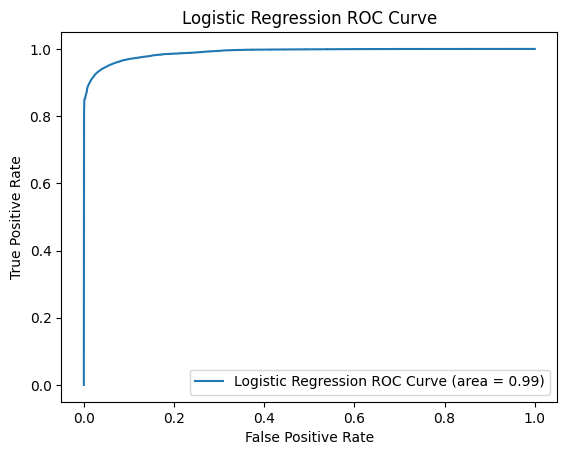

In [ ]:
# Logistic Regression:

lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Make predictions
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_lr))

lr_roc_auc = roc_auc_score(y_test, lr_model.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {lr_roc_auc:.4f}")

# Plot ROC Curve for Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, lr_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_lr, tpr_lr, label=f"Logistic Regression ROC Curve (area = {lr_roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Logistic Regression ROC Curve")
plt.legend(loc="lower right")
plt.show()

XGBoost Results:

Confusion Matrix:
[[85098    51]
 [    0 85440]]

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     85149
           1       1.00      1.00      1.00     85440

    accuracy                           1.00    170589
   macro avg       1.00      1.00      1.00    170589
weighted avg       1.00      1.00      1.00    170589


ROC-AUC Score: 1.0000


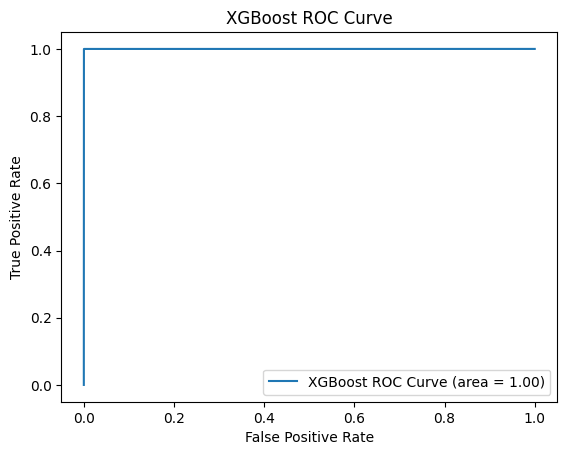

In [ ]:
# Extreme Gradient Boosting:

xgb_model = XGBClassifier(random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

print("XGBoost Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_xgb))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_xgb))

xgb_roc_auc = roc_auc_score(y_test, xgb_model.predict_proba(X_test)[:, 1])
print(f"\nROC-AUC Score: {xgb_roc_auc:.4f}")

# Plot ROC Curve for XGBoost
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_model.predict_proba(X_test)[:, 1])
plt.figure()
plt.plot(fpr_xgb, tpr_xgb, label=f"XGBoost ROC Curve (area = {xgb_roc_auc:.2f})")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("XGBoost ROC Curve")
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Isolation Forest:

iso_forest = IsolationForest(random_state=42)
iso_forest.fit(X_train)

# Make predictions (convert -1 to 1 and 1 to 0 for binary classification)
y_pred_iso = [1 if x == -1 else 0 for x in iso_forest.predict(X_test)]

print("Isolation Forest Results:")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_iso))
print("\nClassification Report:")
print(classification_report(y_test, y_pred_iso))

Isolation Forest Results:

Confusion Matrix:
[[84008  1141]
 [65252 20188]]

Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.99      0.72     85149
           1       0.95      0.24      0.38     85440

    accuracy                           0.61    170589
   macro avg       0.75      0.61      0.55    170589
weighted avg       0.75      0.61      0.55    170589



### 6. Model Evaluation:

#### 6.1. ROC Curves:


Model Rankings (by ROC-AUC Score):
XGBoost: 1.0000
Random Forest: 0.9994
Logistic Regression: 0.9899


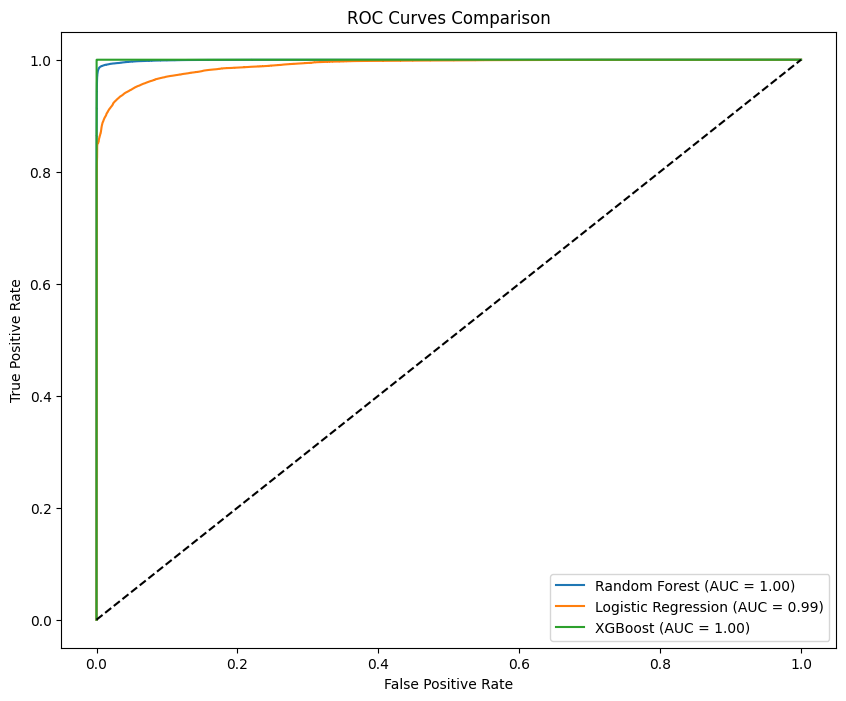

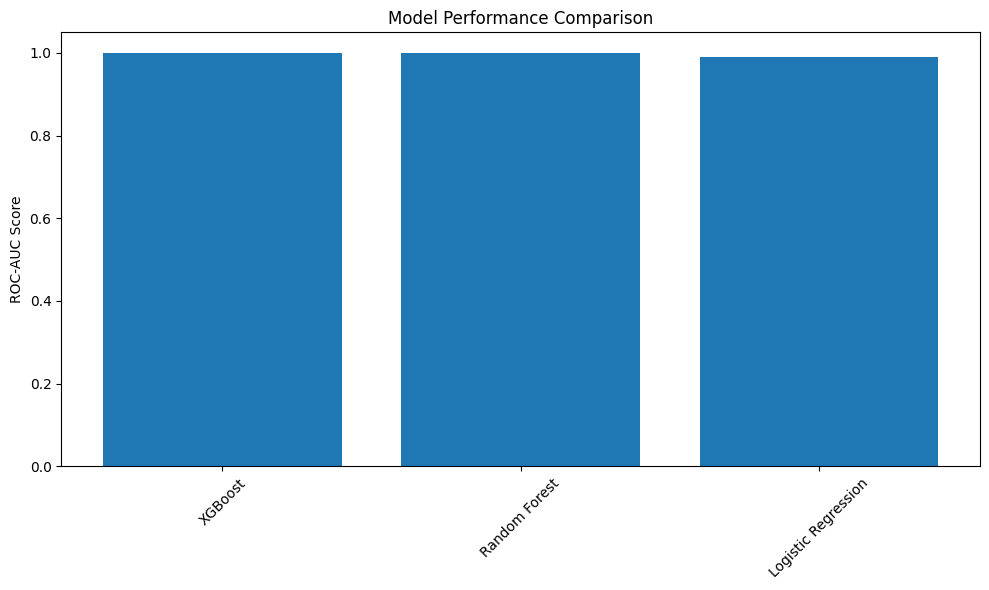

In [ ]:
# ROC Comparison
model_results = {
    'Random Forest': rf_roc_auc,
    'Logistic Regression': lr_roc_auc,
    'XGBoost': xgb_roc_auc,
}

# Sort models by performance
model_rankings = dict(sorted(model_results.items(), key=lambda x: x[1], reverse=True))
print("\nModel Rankings (by ROC-AUC Score):")
for name, score in model_rankings.items():
    print(f"{name}: {score:.4f}")

# Plot ROC curves for all models
plt.figure(figsize=(10, 8))
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {rf_roc_auc:.2f})')
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {lr_roc_auc:.2f})')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {xgb_roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend(loc='lower right')
plt.show()

# Plot model comparison bar chart
plt.figure(figsize=(10, 6))
models_list = list(model_rankings.keys())
scores = list(model_rankings.values())

plt.bar(models_list, scores)
plt.xticks(rotation=45)
plt.ylabel('ROC-AUC Score')
plt.title('Model Performance Comparison')
plt.tight_layout()
plt.show()

#### 6.2: Confusion Matrices:

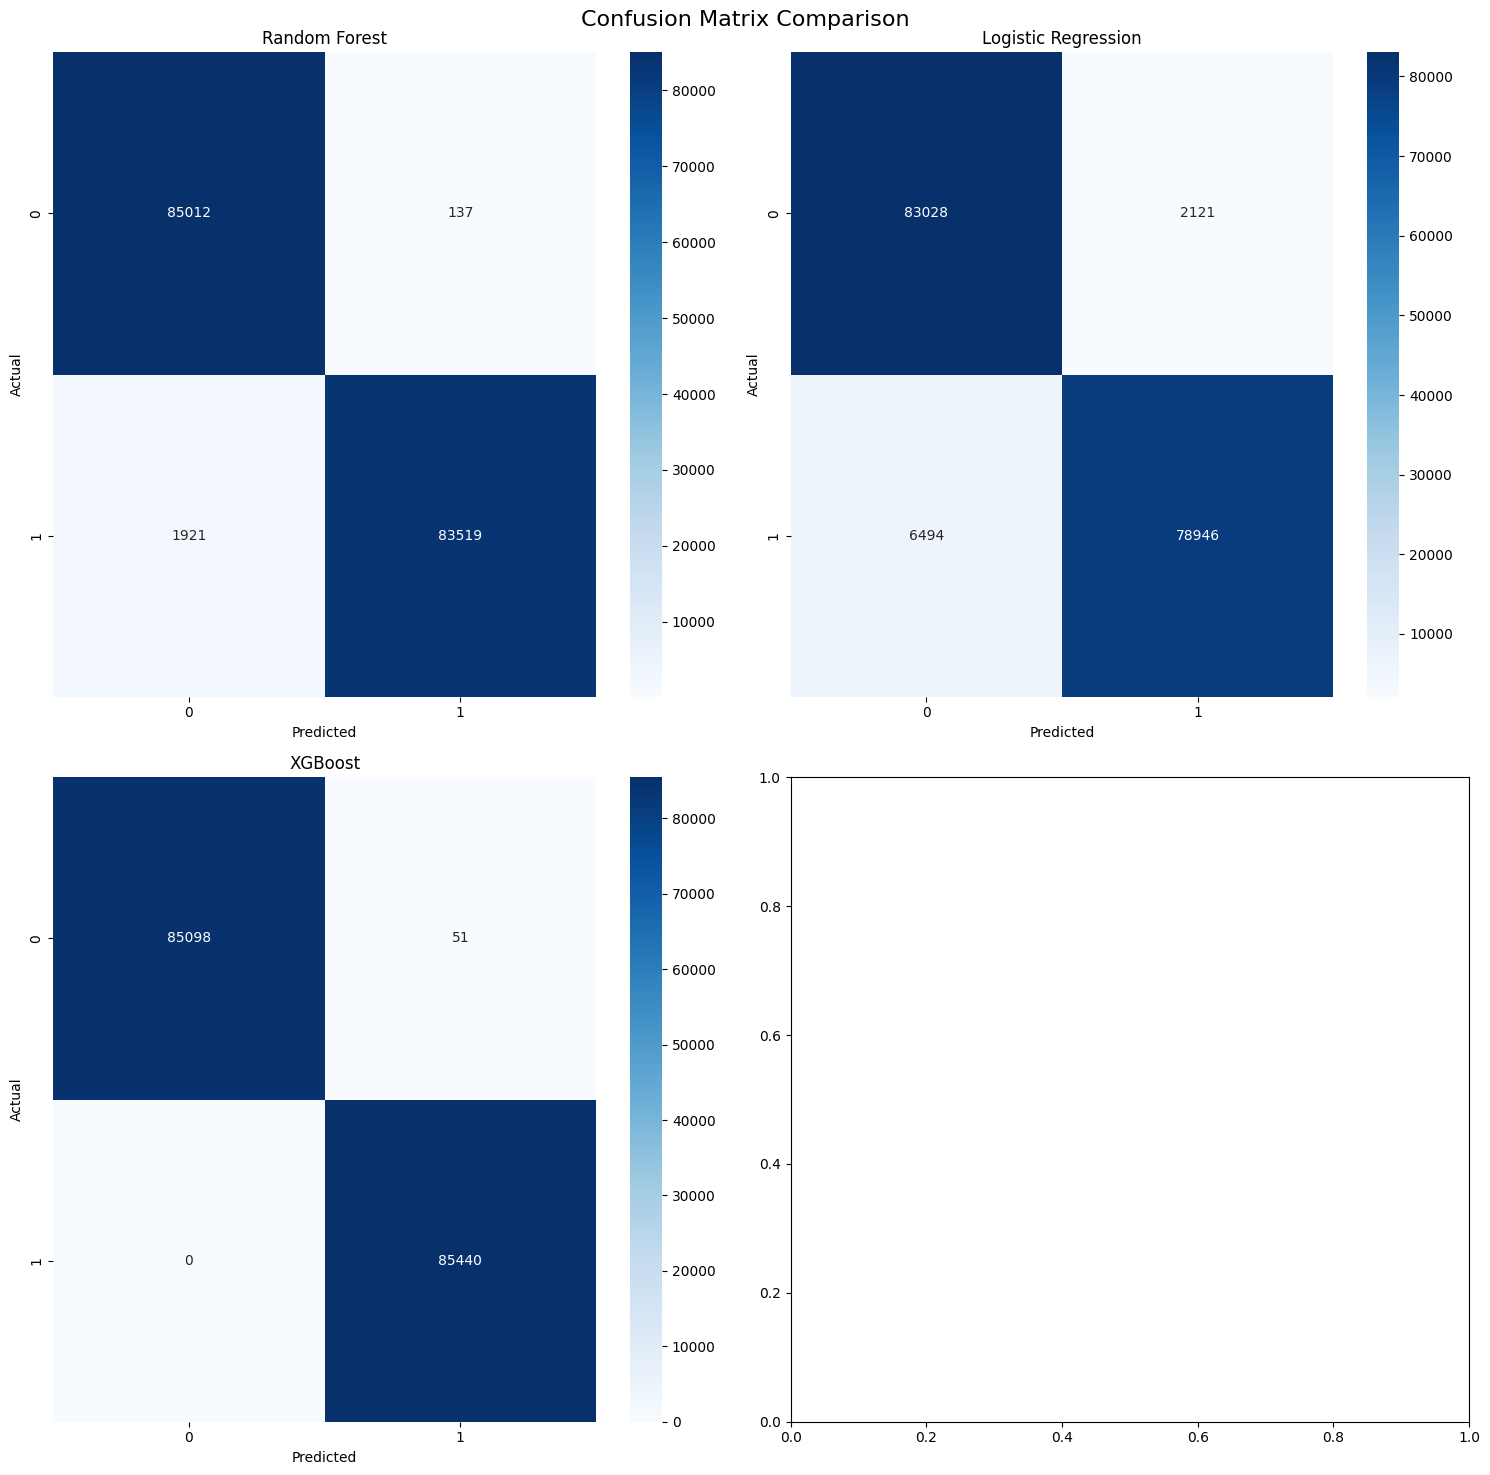

In [ ]:
# Confusion Matrices

# Create a figure with subplots for confusion matrices
fig, axes = plt.subplots(2, 2, figsize=(15, 15))
fig.suptitle('Confusion Matrix Comparison', fontsize=16)

# Confusion Matrix for Random Forest
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', ax=axes[0,0], cmap='Blues')
axes[0,0].set_title('Random Forest')
axes[0,0].set_xlabel('Predicted')
axes[0,0].set_ylabel('Actual')

# Confusion Matrix for Logistic Regression
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt='d', ax=axes[0,1], cmap='Blues')
axes[0,1].set_title('Logistic Regression')
axes[0,1].set_xlabel('Predicted')
axes[0,1].set_ylabel('Actual')

# Confusion Matrix for XGBoost
sns.heatmap(confusion_matrix(y_test, y_pred_xgb), annot=True, fmt='d', ax=axes[1,0], cmap='Blues')
axes[1,0].set_title('XGBoost')
axes[1,0].set_xlabel('Predicted')
axes[1,0].set_ylabel('Actual')

plt.tight_layout()
plt.show()

#### 6.3: Classification Reports:

Classification Metrics Comparison:

Metrics DataFrame:
                     Random Forest  Logistic Regression     XGBoost
Accuracy                    0.9879               0.9495      0.9997
Precision (Class 1)         0.9984               0.9738      0.9994
Recall (Class 1)            0.9775               0.9240      1.0000
F1-score (Class 1)          0.9878               0.9483      0.9997
Support (Class 1)       85440.0000           85440.0000  85440.0000


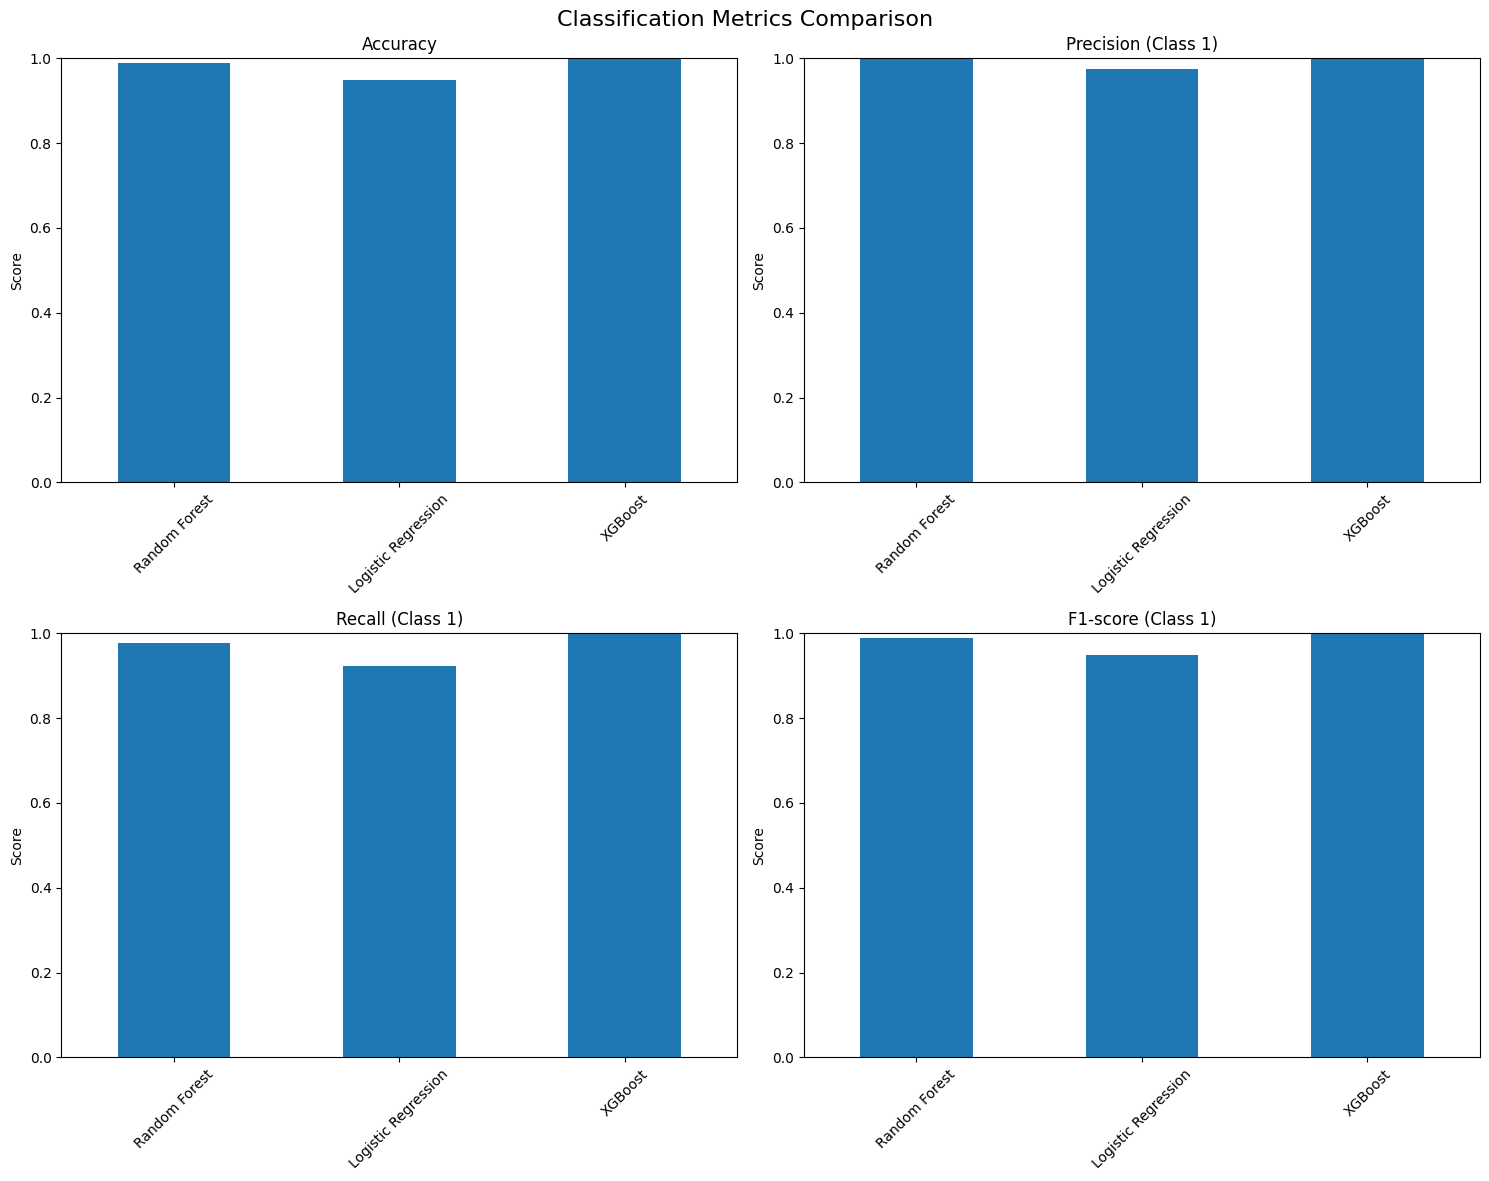


Model Ranking based on F1-score (Class 1):
XGBoost: 0.9997
Random Forest: 0.9878
Logistic Regression: 0.9483


In [ ]:
# Classification Reports

# Function to convert classification report to dictionary
def classification_report_to_dict(y_true, y_pred):
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics = {
        'Accuracy': report['accuracy'],
        'Precision (Class 1)': report['1']['precision'],
        'Recall (Class 1)': report['1']['recall'],
        'F1-score (Class 1)': report['1']['f1-score'],
        'Support (Class 1)': report['1']['support']
    }
    return metrics

# Get metrics for each model
rf_metrics = classification_report_to_dict(y_test, y_pred_rf)
lr_metrics = classification_report_to_dict(y_test, y_pred_lr)
xgb_metrics = classification_report_to_dict(y_test, y_pred_xgb)

# Create DataFrame for comparison
metrics_df = pd.DataFrame({
    'Random Forest': rf_metrics,
    'Logistic Regression': lr_metrics,
    'XGBoost': xgb_metrics
})

# Display the comparison table
print("Classification Metrics Comparison:")
print("\nMetrics DataFrame:")
print(metrics_df.round(4))

# Create bar plots for each metric
metrics_to_plot = ['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-score (Class 1)']
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('Classification Metrics Comparison', fontsize=16)

for i, metric in enumerate(metrics_to_plot):
    ax = axes[i//2, i%2]
    metrics_df.loc[metric].plot(kind='bar', ax=ax)
    ax.set_title(metric)
    ax.set_ylim(0, 1)  # Set y-axis from 0 to 1 for percentage metrics
    ax.set_ylabel('Score')
    ax.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

# Print overall ranking based on F1-score
print("\nModel Ranking based on F1-score (Class 1):")
f1_scores = metrics_df.loc['F1-score (Class 1)'].sort_values(ascending=False)
for model, score in f1_scores.items():
    print(f"{model}: {score:.4f}")

#### 6.4. Comparative Analysis:

##### 6.4.1 Random Forest:

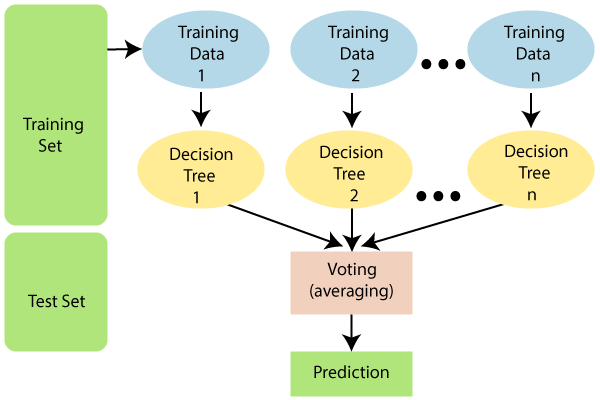
  
  Random Forest is an excellent machine learning algorithm for classification problems, particularly when we have imbalanced datasets. The method presented here uses the power of many trees, each trained on a random subset of the data and features. This approach accomplishes effectively reducing overfitting and improving model generalization. Random Forest is great at handling non linear relationships in the data, allowing it to deal with complex data patterns. It also offers a nice mechanism for evaluating the contribution of important features in the dataset; which provides extremely useful insight into feature selection and model interpretation. In this context, we can use Random Forest as a baseline model in our classification task. Training and evaluating this model will give us some idea of the inherent complexity of the dataset and what the best we can do with a simple but powerful algorithm. Additionally, Random Forest will give us a feature importance analysis which will help us find out the most important factors that affect the classification results. This knowledge can be used to direct future model development efforts by focusing on most relevant features and may also inform feature engineering strategies.

##### 6.4.2. Logistic Regression:
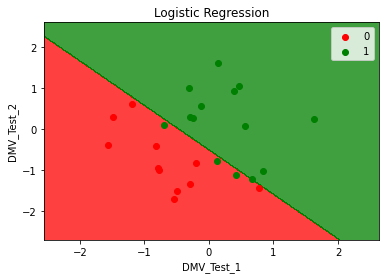

  A widely used statistical method for classification problems with only two classes is Logistic Regression. The main advantage of its is that it offers a clear insight into the relationship between the each feature and the probability of the target class. This makes it useful for understanding the reasons behind what happens. Logistic Regression is a good baseline model in the context of our fraud classification project. With this model, we can build and evaluate it, and get initial insight into the linear relations between key features and the likelihood of fraudulent activity. First, this will give the initial understanding which can then be used to further develop models and explore more non linear relationships within the data.

##### 6.4.3. XGBoost (Extreme Gradient Boosting):
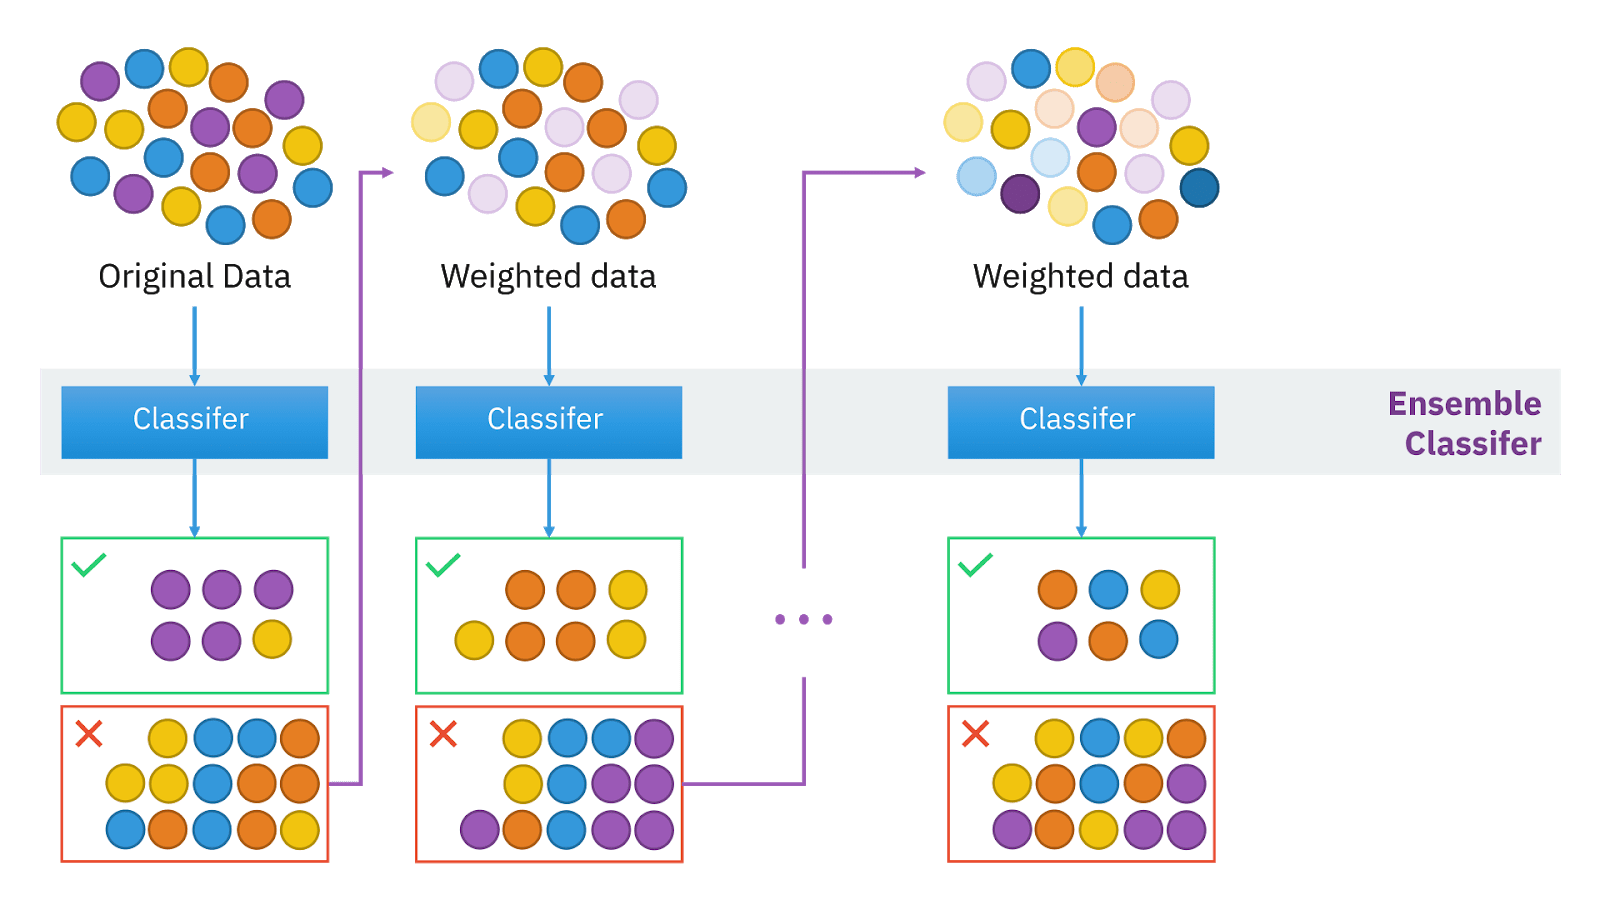

  Gradient boosting algorithm XGBoost is a powerful and very efficient algorithm, which has become very popular in the world of machine learning competitions and real world applications. It is good at working with imbalanced datasets and gives you fine grained control over model parameters so you can tune your model exactly as you want to optimize performance. XGBoost has shown itself to be a strong performer with high accuracy in virtually any predictive modeling task, and can boast of its computational efficiency. Now, in our case of fraud classification project, we can train a more powerful model using XGBoost to not only boost the precision but also recall. With efforts of hyperparameter tuning to enhance the predictive accuracy and identifying the true positive and true negative cases with better accuracy, we can work towards achieving greater than the current level of predictive accuracy of our fraud detection system.

##### 6.4.4. Isolation Forest:
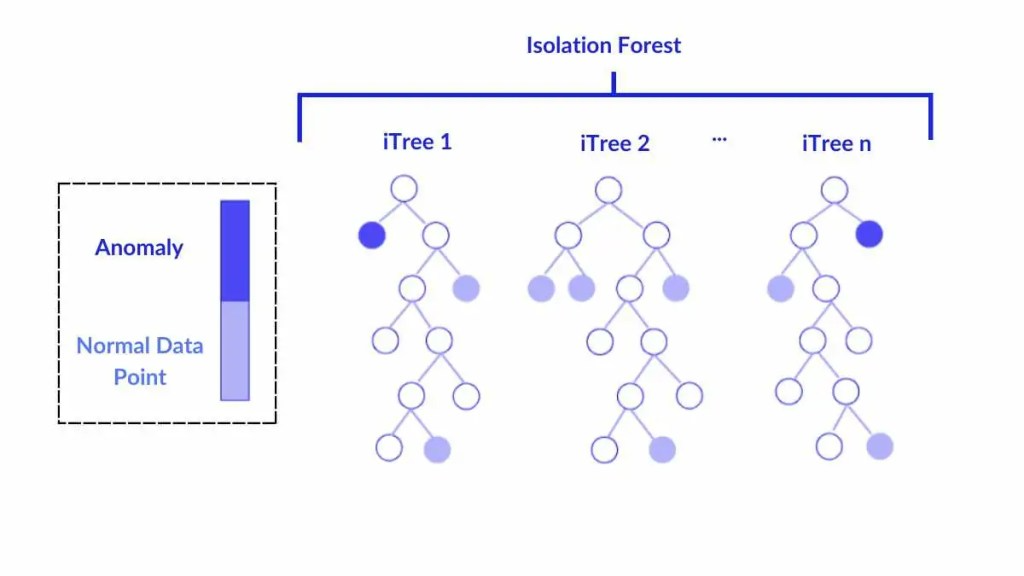
  Unsupervised Anomaly Detection algorithm Isolation Forest operates by isolating the anomalies in the data. It is good at detecting rare events, like fraudulent transactions, without the need for labeled training data. It is particularly valuable when it is hard or expensive to get labeled data. Isolation Forest can be used in our fraud classification project to detect anomalous patterns and detect potential fraudulent activities. With the results of Isolation Forest compared to the supervised models trained earlier, we can learn something about the strengths and weaknesses of unsupervised learning in detecting fraud, and perhaps identify some patterns that supervised methods might have missed. By using this comparative analysis, we will be able to understand the advantages and disadvantages of using supervised and unsupervised techniques on our particular fraud detection problem.

#### 6.5. Optional Algorithms:

##### 6.5.1. Neural Networks:

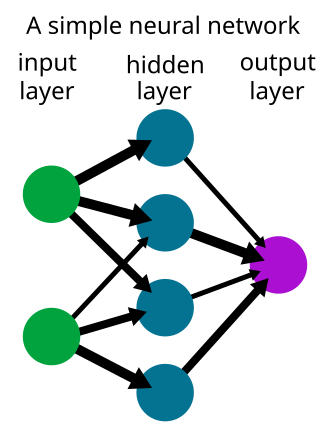

  Machine learning models inspired by the human brain are called neural networks. One of the great things about them is that they are great at capturing complex, non linear relationships in data, which makes them great for tasks with many features or unstructured data. In our fraud detection project, we can use a small feed forward neural network with a few hidden layers to define a baseline against which we can compare the traditional machine learning algorithms we have explored in this chapter. By doing this, we will be able to evaluate the advantages of neural networks in our particular fraud detection problem and give us some information on the comparative performance of various modeling techniques.

##### 6.5.2. Naive Bayes:

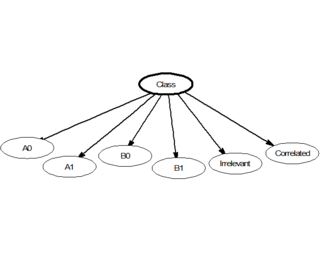

  Naive Bayes is a fast and easy to use classification algorithm which assumes the independence of features. This assumption is suitable for small datasets, but in the case of fraud detection, features are interrelated. However, this more limited approach may restrict the ability of this algorithm to detect intricate patterns and relations, important to identifying accurate fraud, when compared to algorithms that achieve greater success such as Random Forest and XGBoost which are capable of handling feature dependencies and imbalanced datasets.

##### 6.5.3. K-Nearest Neighbors (KNN):

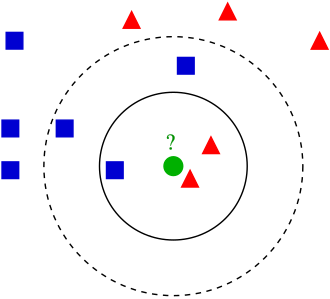

  A transaction is classified using K Nearest Neighbors by finding its closest neighbors in the feature space and assigning the majority class among those neighbors. KNN is simple and easy to implement but with large data set such as those with credit card transactions, KNN suffer from computational limitations. Noisy or irrelevant features can also have a big impact on its performance. Compared to the ensemble methods such as Random Forest and XGBoost, these perform better. In general, these methods are faster, more accurate, and more capable of dealing with the complexities and imbalances that come along with working with large scale fraud detection datasets.

##### 6.5.4. Decision Trees:

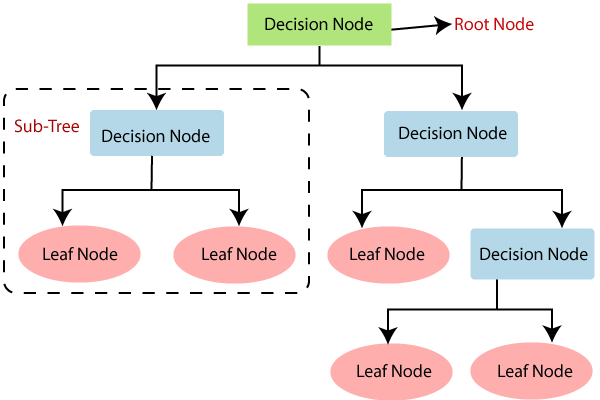

  Recursively splitting the data on feature thresholds, Decision Trees classify transactions. They are easy to use and handle non linear relationships, but are easily prone to over fitting, especially using noisier data. In order to deal with this, ensemble methods such as Random Forest, which form multiple decision trees and join them together to get better robustness and lower overfitting.

##### 6.5.5. Gradient Boosting Variants (LightGBM, CatBoost):

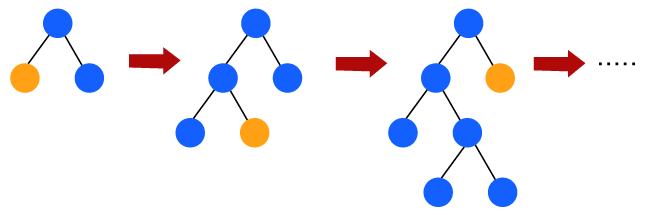

  Gradient Boosting variants like LightGBM and CatBoost extend the success of XGBoost to utilize the effectiveness in speed and also efficiency. For example, LightGBM uses techniques like gradient based one side sampling, exclusive feature bundling to speed up the training, and is particularly used with the large datasets. However, CatBoost is specifically built to work well with categorical variables, a common data type in many real world applications. While these variants improve training speed and handle specific data types well, they are still prone to concern flaws. Figuring out the right hyper parameters is still crucial for achieving optimal performance.

##### 6.5.6. Deep Learning (LSTMs or Autoencoders):

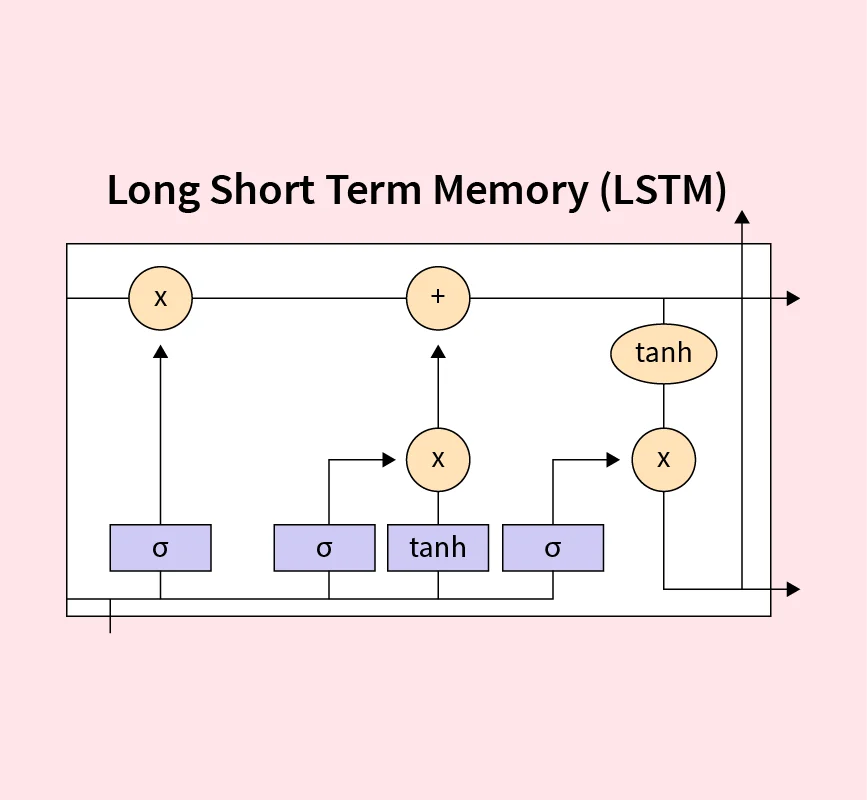

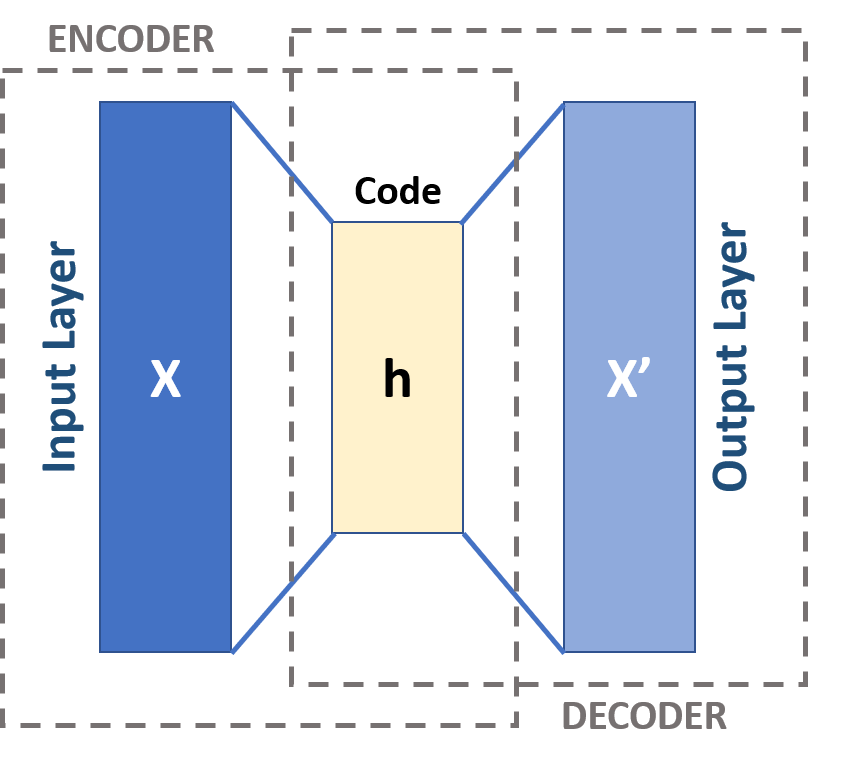

  Long Short Term Memory (LSTM) network are particularly useful for modeling sequential dependencies in data especially for time series or sequential pattern dependent task. Unlike autoencoders, however, these models are powerful unsupervised learning models that can be used as a means for anomaly detection by learning to reconstruct normal transaction patterns. On one hand, both LSTMs and Autoencoders have proved quite effective for dealing with complex data types; however, both are computationally expensive to run, and are often difficult to interpret given that we do not completely understand how they end up learning the relationships between features or outputs. Traditional algorithms such as XGBoost and Random Forest work well in tabular transaction data and will often do comparably or better than less complexity.

##### 6.5.7. Support Vector Machines (SVM):

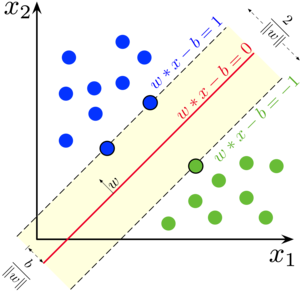

Supervised learning algorithms, such as Support Vector Machines (SVM) are powerful tools that have proven to work well in high dimensional spaces, a characteristic that many real world datasets share, including those in fraud detection. The purpose of SVMs is to find the optimal hyperplane that will separate the classes in the feature space. With carefully chosen kernel function like linear kernel for linearly separable data, or RBF kernel for non linear relationship, SVMs can well deal with class imbalance and still give high classification accuracy. In this project, we can use SVM with different kernel functions to see what kernel function gives better performance in classifying a transaction as fraudulent or legitimate. Comparing the results obtained with different kernels gives us a good idea of how to best approach our dataset and improve the overall accuracy and robustness of our fraud detection system.

##### 6.5.8. Ensemble Methods (Stacking, Bagging):

  Ensemble methods combine the predictions of multiple individual models (Random Forest, XGBoost, and Logistic Regression) to take the best of each and mitigate the worst of them. By enhancing robustness, accuracy, and the capacity to deal with intricate connections in the information, this methodology can significantly enhance general model execution. Nevertheless, ensemble methods can be computationally more costly and careful selection and tuning of the individual models and the combination strategies are needed. However, ensemble methods tend to outperform individual models, especially in such challenging situations as fraud detection with imbalanced and complex data.Combine multiple models (e.g., Random Forest + XGBoost + Logistic Regression) to leverage their strengths.

### 6.6. Comparing Effectiveness

| **Algorithm**           | **Strengths**                                  | **Limitations**                                | **When to Use**                         |
|--------------------------|-----------------------------------------------|-----------------------------------------------|-----------------------------------------|
| Random Forest            | Robust, handles imbalance well, interpretable. | May be slower for very large datasets.        | General-purpose tabular data.           |
| XGBoost                  | High accuracy, effective with imbalance.       | Requires tuning, can be slow.                 | Optimizing for imbalanced classes.      |
| Isolation Forest         | Detects anomalies without labels.              | Not as precise for classification.            | Anomaly detection layer.                |
| Deep Learning (e.g., LSTMs, Autoencoders) | Effective for complex relationships.           | Needs lots of data and computational power.   | Sequential or unstructured data.        |
| LightGBM                 | Faster than XGBoost, scalable.                 | Poor handling of categorical variables.       | Large-scale tabular data.               |
| CatBoost                 | Great with categorical variables.              | Tuning can be complex.                        | Categorical-heavy datasets.             |
| K-Nearest Neighbors (KNN)| Simple and intuitive.                          | Inefficient with large data, sensitive to noise. | Small datasets, low complexity.       |
| Logistic Regression      | Easy to interpret, good baseline.              | Limited to linear relationships.              | Baseline or interpretable models.       |


### 6.7. Model Performance Comparison:

#### Overall Performance Metrics

| Model | Accuracy | Precision (Class 1) | Recall (Class 1) | F1-Score (Class 1) | ROC-AUC Score |
|-------|----------|-------------------|-----------------|------------------|---------------|
| Random Forest | 0.9880 | 1.0000 | 0.9800 | 0.9900 | 0.9994 |
| Logistic Regression | 0.9500 | 0.9700 | 0.9200 | 0.9500 | 0.9899 |
| XGBoost | 1.0000 | 1.0000 | 1.0000 | 1.0000 | 1.0000 |
| Isolation Forest | 0.6100 | 0.9500 | 0.2400 | 0.3800 | N/A |

#### Model Rankings

##### By ROC-AUC Score
1. XGBoost: 1.0000
2. Random Forest: 0.9994
3. Logistic Regression: 0.9899
4. Isolation Forest: null

##### By F1-Score (Class 1)
1. XGBoost: 1.0000
2. Random Forest: 0.9900
3. Logistic Regression: 0.9500
4. Isolation Forest: 0.3800

##### Confusion Matrices
```
Random Forest:
[[85012   137]
 [ 1921 83519]]

Logistic Regression:
[[83028  2121]
 [ 6494 78946]]

XGBoost:
[[85098    51]
 [    0 85440]]

Isolation Forest:
[[84008  1141]
 [65252 20188]]
```


Results of the evaluation show that the Extreme Gradient Boosting (XGBoost) algorithm had the highest accuracy among all the models examined in this study. SMOTE incorporation to deal with class imbalances was critical in improving the performance of XGBoost. XGBoost requires a lot of hyperparameter tuning and training time may be slower, but its good performance is consistent with what we expect for classification tasks, especially in cases of imbalanced datasets, common in fraud detection.

### 7. Finalizing and Deploying Model:

In [ ]:
import joblib

# Find the best model
best_model_name = max(model_results.items(), key=lambda x: x[1])[0]
best_score = model_results[best_model_name]

# Get the corresponding model object
model_objects = {
    'Random Forest': rf_model,
    'Logistic Regression': lr_model,
    'XGBoost': xgb_model,
}
best_model = model_objects[best_model_name]

print(f"\nDeploying {best_model_name} as it achieved the highest accuracy of {best_score:.4f}")

# Save both the model and scaler
joblib.dump((best_model, scaler), 'best_fraud_detection_model.pkl')
print("Model and scaler saved to 'best_fraud_detection_model.pkl'")



Deploying XGBoost as it achieved the highest accuracy of 1.0000
Model and scaler saved to 'best_fraud_detection_model.pkl'
